<a href="https://colab.research.google.com/github/gangasris03/task-3-linear-regression/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/content/Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [11]:
X = df.drop('price', axis=1) # Changed 'medv' to 'price'
y = df['price'] # Changed 'medv' to 'price'

In [8]:
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [9]:
X = pd.get_dummies(X, drop_first=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

# Evaluation Metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 970043.4039201636
MSE: 1754318687330.6638
R² Score: 0.6529242642153184


In [15]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


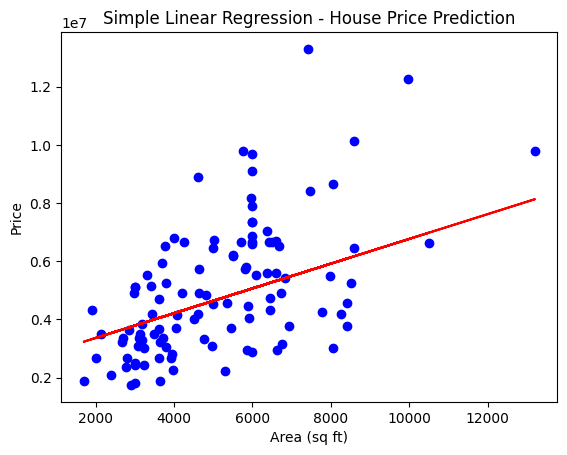

In [16]:
X_single = df[['area']]  # Taking 'area' as feature
y_single = df['price']   # Target variable

# Now split and train
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

model_single = LinearRegression()
model_single.fit(X_train_s, y_train_s)

# Plotting
plt.scatter(X_test_s, y_test_s, color='blue')
plt.plot(X_test_s, model_single.predict(X_test_s), color='red')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Simple Linear Regression - House Price Prediction')
plt.show()